In [11]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import numpy as np

X = np.load("out/celeba_eyeglasses_latents/X_latents.npy")
y = np.load("out/celeba_eyeglasses_latents/y_labels.npy")

X = X.reshape(X.shape[0], -1)  # Flatten W vectors

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)
print("SVM Accuracy:", clf.score(X_test, y_test))


SVM Accuracy: 0.8


Accuracy: 0.8000
Confusion Matrix:
[[240  64]
 [ 56 240]]
Classification Report:
               precision    recall  f1-score   support

No Eyeglasses       0.81      0.79      0.80       304
   Eyeglasses       0.79      0.81      0.80       296

     accuracy                           0.80       600
    macro avg       0.80      0.80      0.80       600
 weighted avg       0.80      0.80      0.80       600



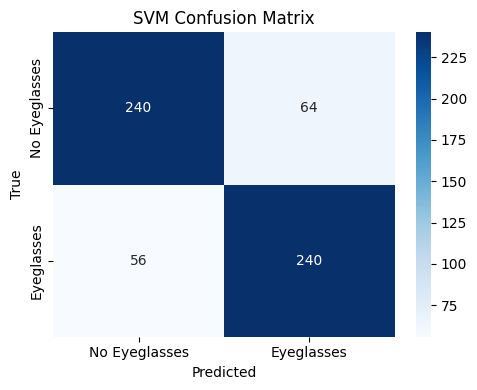

In [12]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Predict on test set
y_pred = clf.predict(X_test)

# Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.4f}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Classification report (precision, recall, f1)
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=["No Eyeglasses", "Eyeglasses"]))

# Optional: Plot confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["No Eyeglasses", "Eyeglasses"],
            yticklabels=["No Eyeglasses", "Eyeglasses"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("SVM Confusion Matrix")
plt.tight_layout()
plt.show()


In [14]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.8000
Recall: 0.8108
Precision: 0.7895
F1 Score: 0.8000


In [2]:
X = np.load("out/celeba_eyeglasses_latents/X_latents.npy")  # shape: (N, 1, 512)
y = np.load("out/celeba_eyeglasses_latents/y_labels.npy")   # shape: (N,)

# Flatten (remove the singleton dimension)
X = X[:, 0, :]  # shape: (N, 512)

# Separate by class
X_eyeglasses = X[y == 1]
X_no_eyeglasses = X[y == 0]

# Compute means
mean_eyeglasses = X_eyeglasses.mean(axis=0)
mean_no_eyeglasses = X_no_eyeglasses.mean(axis=0)

# Compute direction vector
eyeglasses_direction = mean_eyeglasses - mean_no_eyeglasses

# Optional: normalize direction vector
eyeglasses_direction /= np.linalg.norm(eyeglasses_direction)

# Save to file
np.save("out/celeba_eyeglasses_latents/eyeglasses_direction_mean.npy", eyeglasses_direction)

print("✅ Saved latent direction vector for 'eyeglasses'.")

✅ Saved latent direction vector for 'eyeglasses'.


In [13]:
# Extract the decision boundary normal vector
svm_direction = clf.coef_[0].copy()  # shape: (512,)
svm_direction /= np.linalg.norm(svm_direction)  # normalize

# Save
np.save("out/celeba_eyeglasses_latents/eyeglasses_direction_svm.npy", svm_direction)
print("✅ Saved SVM-derived eyeglasses direction vector.")

✅ Saved SVM-derived eyeglasses direction vector.


Try new method option 2 for svm direction vector

edit: it doesn't work very well

SVM Accuracy: 0.8117
Confusion Matrix:
[[230  57]
 [ 56 257]]
Classification Report:
               precision    recall  f1-score   support

No Eyeglasses       0.80      0.80      0.80       287
   Eyeglasses       0.82      0.82      0.82       313

     accuracy                           0.81       600
    macro avg       0.81      0.81      0.81       600
 weighted avg       0.81      0.81      0.81       600



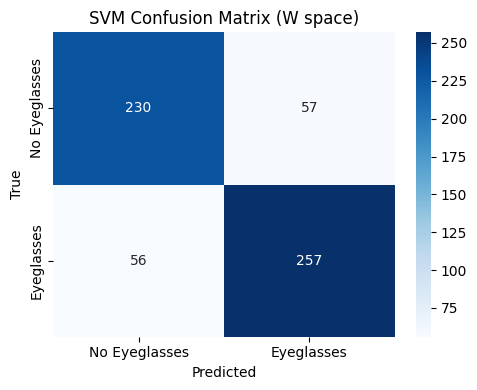

✅ Saved SVM-derived direction vector (W space) to eyeglasses_direction_svm.npy


In [10]:
X = np.load("out/celeba_eyeglasses_latents/X_latents.npy")   # (N, 14, 512)
X_mean = X.mean(axis=1)             # (N, 512)
y = np.load("out/celeba_eyeglasses_latents/y_labels.npy")

X_train, X_test, y_train, y_test = train_test_split(X_mean, y, test_size=0.2, random_state=42)

# --- Train linear SVM ---
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)

# --- Evaluate ---
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"SVM Accuracy: {acc:.4f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=["No Eyeglasses", "Eyeglasses"]))

# --- Optional: Visualize confusion matrix ---
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=["No Eyeglasses", "Eyeglasses"],
            yticklabels=["No Eyeglasses", "Eyeglasses"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("SVM Confusion Matrix (W space)")
plt.tight_layout()
plt.show()

# --- Extract and normalize direction vector ---
svm_direction = clf.coef_[0].copy()
svm_direction /= np.linalg.norm(svm_direction)

# --- Save direction vector ---
np.save("out/celeba_eyeglasses_latents/eyeglasses_direction_svm.npy", svm_direction)
print("✅ Saved SVM-derived direction vector (W space) to eyeglasses_direction_svm.npy")


Running t-SNE...


c:\Users\alexi\anaconda3\envs\stylegan2ada\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
c:\Users\alexi\anaconda3\envs\stylegan2ada\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


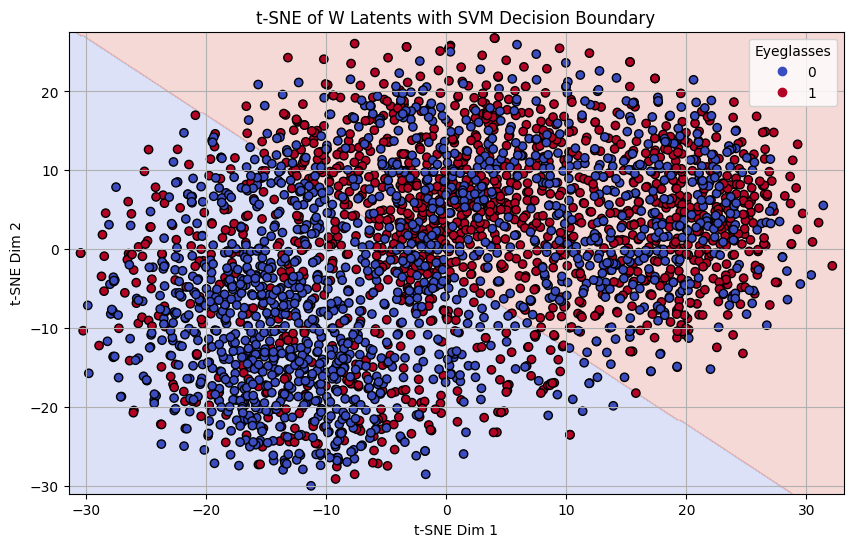

In [6]:
import numpy as np
from sklearn.manifold import TSNE
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load latent vectors and labels
X = np.load("out/celeba_eyeglasses_latents/X_latents.npy")  # shape: (N, 14, 512)
y = np.load("out/celeba_eyeglasses_latents/y_labels.npy")

# Option: Use W space (average across layers)
X_flat = X.mean(axis=1)  # shape: (N, 512)

# Reduce to 2D with t-SNE
print("Running t-SNE...")
X_tsne = TSNE(n_components=2, perplexity=30, random_state=42).fit_transform(X_flat)

# Train SVM on 2D embeddings
clf_2d = SVC(kernel="linear")
clf_2d.fit(X_tsne, y)

# Plot with decision boundary
h = 0.2
x_min, x_max = X_tsne[:, 0].min() - 1, X_tsne[:, 0].max() + 1
y_min, y_max = X_tsne[:, 1].min() - 1, X_tsne[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = clf_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.2, cmap=plt.cm.coolwarm)
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
plt.title("t-SNE of W Latents with SVM Decision Boundary")
plt.xlabel("t-SNE Dim 1")
plt.ylabel("t-SNE Dim 2")
plt.grid(True)
plt.legend(*scatter.legend_elements(), title="Eyeglasses")
plt.show()


Check model parameters

In [18]:
import torch
import dnnlib
import legacy

device = torch.device('cuda')
with dnnlib.util.open_url("stylegan2-celebahq-256x256.pkl") as f:
    data = legacy.load_network_pkl(f)
    
G = data['G_ema'].to(device)  # Generator (exponential moving average)
D = data['D'].to(device)      # Discriminator


def count_params(model):
    return sum(p.numel() for p in model.parameters())

print(f"Generator (G_ema) parameters: {count_params(G):,}")
print(f"Discriminator parameters: {count_params(D):,}")


Generator (G_ema) parameters: 24,767,458
Discriminator parameters: 24,001,089
